In [1]:
import numpy as np

#Create fake income/age clusters for N people in k clusters
def createClusteredData(N, k):
    np.random.seed(1234)
    pointsPerCluster = float(N)/k
    X = []
    y = []
    for i in range (k):
        incomeCentroid = np.random.uniform(20000.0, 200000.0)
        ageCentroid = np.random.uniform(20.0, 70.0)
        for j in range(int(pointsPerCluster)):
            X.append([np.random.normal(incomeCentroid, 10000.0), np.random.normal(ageCentroid, 2.0)])
            y.append(i)
    X = np.array(X)
    y = np.array(y)
    return X, y

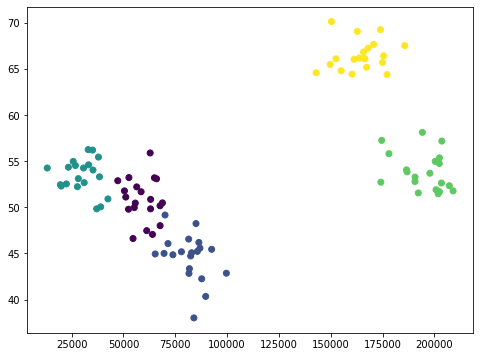

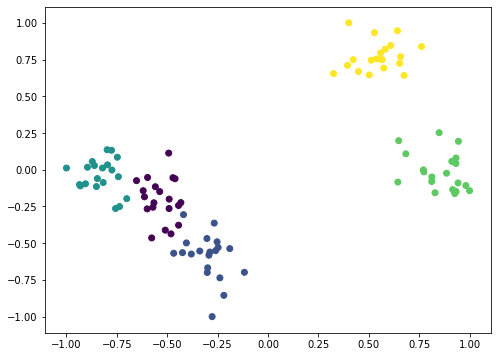

In [2]:
%matplotlib inline
from pylab import *
from sklearn.preprocessing import MinMaxScaler

(X, y) = createClusteredData(100, 5)

plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], c=y.astype(np.float))
plt.show()

scaling = MinMaxScaler(feature_range=(-1,1)).fit(X)
X = scaling.transform(X)

plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], c=y.astype(np.float))
plt.show()

In [ ]:
from sklearn import svm, datasets

C = 1.0
svc = svm.SVC(kernel='poly', C=C).fit(X, y)

/Users/harshmisra/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
def plotPredictions(clf):
    # Create a dense grid of points to sample 
    xx, yy = np.meshgrid(np.arange(-1, 1, .001),
                     np.arange(-1, 1, .001))
    
    # Convert to Numpy arrays
    npx = xx.ravel()
    npy = yy.ravel()
    
    # Convert to a list of 2D (income, age) points
    samplePoints = np.c_[npx, npy]
    
    # Generate predicted labels (cluster numbers) for each point
    Z = clf.predict(samplePoints)

    plt.figure(figsize=(8, 6))
    Z = Z.reshape(xx.shape) #Reshape results to match xx dimension
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8) # Draw the contour
    plt.scatter(X[:,0], X[:,1], c=y.astype(np.float)) # Draw the points
    plt.show()
    
plotPredictions(svc)

In [5]:
print(svc.predict([[200000, 40]]))

[3]


In [6]:
print(svc.predict([[50000, 65]]))

[3]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


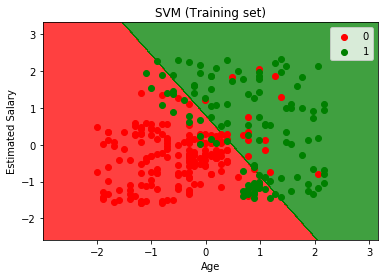

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


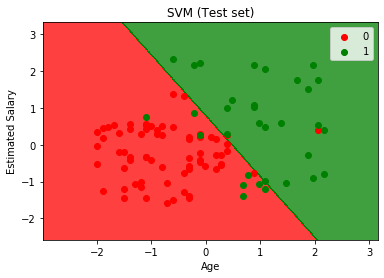

In [8]:
# Support Vector Machine (SVM)

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('/Users/harshmisra/Python Practise/Data Sources/Social_Network_Ads.csv')
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
